# ✒️ Executing JavaScript & HTML from Python

In [1]:
from IPython.display import display,HTML,Javascript,JSON,Image
from IPython.core.magic import register_line_magic
from google.colab import output

In [2]:
display(Javascript("""
  window.someValue=new Promise(resolve=>{
      setTimeout(()=>{resolve('😋 😌 😍 😎 😏 HELLO!!!');},100);});
"""))
output.eval_js('someValue')

<IPython.core.display.Javascript object>

'😋 😌 😍 😎 😏 HELLO!!!'

In [3]:
js_str="""
var out1=document.querySelector('#output-area'),
    text1=document.createElement('text'),
    str1='😋 😌 😍 😎 😏 HELLO!!!';
text1.appendChild(document.createTextNode(str1));
out1.appendChild(text1);
text1.id='text1'; text1.style.padding='20px';
out1.style.border='double'; out1.style.width='50%';
var tc=setInterval(function() {
  var doc=document.getElementById('text1');
  var sec=Math.floor(new Date().getTime()%60000/1000);
  var col='rgb('+(10+Math.abs(245-8*sec))+',0,'+
          (255-Math.abs(245-8*sec))+')';
  doc.style.color=col;}, 1000);  
"""
display(Javascript(js_str))

<IPython.core.display.Javascript object>

In [4]:
html_str="""
<script>
function addTextNode(text){
  var newtext=document.createTextNode(text),
      p1=document.getElementById('p1');
  p1.appendChild(newtext);}
var tc=setInterval(function() {
  var doc=document.getElementById('p1'),
      but1=document.getElementById('button1'),
      but2=document.getElementById('button2');
  var sec=Math.floor(new Date().getTime()%60000/1000);
  var col='rgb('+(10+Math.abs(245-8*sec))+',0,'+
          (255-Math.abs(245-8*sec))+')';
  but1.style.background=col; but2.style.background=col;
  doc.style.color=col;}, 1000);  
</script>
<button id='button1' onclick='addTextNode(&#34;&nbsp;YES! &#34;);'>YES!</button>
<button id='button2' onclick='addTextNode(&#34;&nbsp;NO! &#34;);'>NO!</button>
<hr align='left' style='width:50%;'/><hr align='left' style='width:50%;'/>
<p id='p1' style='font-size:30px;'>Text Nodes:<br/></p>
<hr align='left' style='width:50%;'/><hr align='left' style='width:50%;'/>
"""
display(HTML(html_str))

In [5]:
@register_line_magic
def cmap_header(params):
    params=params.split('|'); string=params[0]
    if len(params)==1: 
        font_size='20'; font_family='Akronim'; cmap='Sinebow'
    elif  len(params)==2: 
        font_size=params[1]; font_family='Akronim'; cmap='Sinebow'
    elif  len(params)==3: 
        font_size=params[1]; font_family=params[2]; cmap='Sinebow'
    else: 
        font_size=params[1]; font_family=params[2]; cmap=params[3]
    html_str="""
    <head><script src='https://d3js.org/d3.v6.min.js'></script></head>
    <style>@import 'https://fonts.googleapis.com/css?family="""+\
    font_family+"""&effect=3d'; #colorized {font-family:"""+font_family+"""; 
    color:white; padding-left:10px; font-size:"""+font_size+"""px;}</style>
    <h1 id='colorized' class='font-effect-3d'>"""+string+"""</h1>
    <script>
    var tc=setInterval(function(){
        var now=new Date().getTime();
        var iddoc=document.getElementById('colorized');
        iddoc.style.color=d3.interpolate"""+cmap+"""(now%(60000)/60000);},1)
    </script>"""
    display(HTML(html_str))
%cmap_header CODE MODULES & HELPFUL TOOLS|24|Ewert|Turbo

#✒️ Tagged Outputs

In [6]:
import sys,time

In [7]:
print('The process is starting')
with output.use_tags('tagged_outputs'):
    for el in ['working \n','=> => => \n','still working \n']:
        sys.stdout.write('working \n')
        sys.stdout.flush(); time.sleep(5)
output.clear(output_tags='tagged_outputs')
print('Outputs have cleared')

The process is starting
Outputs have cleared


# ✒️ Widgets

In [8]:
import pandas as pd,ipywidgets as iw
import altair as alt,pylab as pl
from vega_datasets import data

In [9]:
starts=[17,67,52,35,88]; n=len(starts)
sliders=[iw.IntSlider(starts[i],min=0,max=100) 
         for i in range(n)]
colors=[(i/5.,i/10.,.75) for i in range(n)]
@iw.interact(
    v0=sliders[0],v1=sliders[1],v2=sliders[2],
    v3=sliders[3],v4=sliders[4])
def render(v0,v1,v2,v3,v4):
    values=[v0,v1,v2,v3,v4]; n=len(values)
    df=pd.DataFrame([range(n),values],index=['x','y']).T
    df.y.plot.bar(figsize=(10,4),color=colors); pl.show()

interactive(children=(IntSlider(value=17, description='v0'), IntSlider(value=67, description='v1'), IntSlider(…

In [10]:
def pd_style():
    return [dict(selector='th',
                 props=[('font-size','12pt'),('color','white'),
                        ('min-width','70px'),('height','30px')]),
            dict(selector='td',
                 props=[('font-size','10pt'),('color','whitesmoke'),
                        ('padding','0em 0em'),
                        ('min-width','170px'),('height','30px')]),
            dict(selector='tr:hover th:hover',
                 props=[('font-size','16pt'),
                        ('text-shadow','3px 3px 3px #aaa')]),
            dict(selector='tr:hover td:hover',
                 props=[('font-size','12pt'),
                        ('text-shadow','3px 3px 3px #aaa')])]

In [11]:
source=data.stocks()
stock_picker=iw.SelectMultiple(
    options=source.symbol.unique(),
    value=list(source.symbol.unique()),
    description='SYMBOLS')
@iw.interact(symbols=stock_picker)
def render(symbols):
  selected=source.symbol.isin(list(symbols))
  display(source[selected].head(3).T\
          .style.set_table_styles(pd_style()))
  chart=alt.Chart(source[selected]).mark_line().encode(
      x='date',y='price',color='symbol',strokeDash='symbol')
  return chart

interactive(children=(SelectMultiple(description='SYMBOLS', index=(0, 1, 2, 3, 4), options=('MSFT', 'AMZN', 'I…

# ✒️ Images & Animations

In [12]:
import cv2,numpy as np,imageio,PIL.Image
from skimage import io,transform
from google.colab.patches import cv2_imshow

In [13]:
!curl -o 001.png https://olgabelitskaya.gitlab.io/images/01_001.png
!curl -o 03_012.png https://olgabelitskaya.gitlab.io/images/03_012.png
!curl -o 03_015.png https://olgabelitskaya.gitlab.io/images/03_015.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 93590  100 93590    0     0  11665      0  0:00:08  0:00:08 --:--:-- 24910
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 48489  100 48489    0     0   143k      0 --:--:-- --:--:-- --:--:--  143k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 46448  100 46448    0     0   199k      0 --:--:-- --:--:-- --:--:--  199k


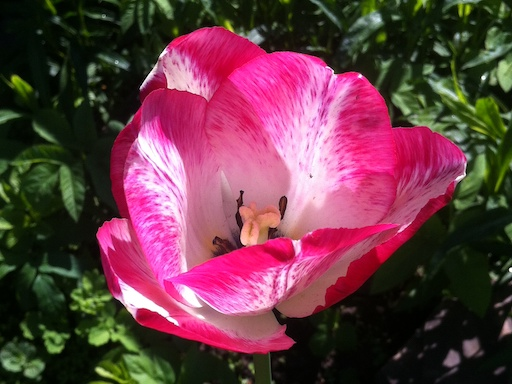

In [14]:
img=cv2.imread('001.png',cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [15]:
file1,file2='03_012.png','03_015.png'
def create_coords(file1,file2):
    img1,img2=io.imread(file1),io.imread(file2)
    imgbw1,imgbw2=np.ones(img1.shape[:2]),np.ones(img2.shape[:2])
    imgbw1[img1[:,:,1]<200],imgbw2[img2[:,:,1]<200]=0,0
    coord1=np.array(np.where(imgbw1<1)).T; coord=coord1
    coord2=np.array(np.where(imgbw2<1)).T
    if coord1.shape[0]>coord2.shape[0]: coord1,coord2=coord2,coord
    while not coord2.shape==coord1.shape:
        randi=np.random.randint(
            0,coord2.shape[0]-1,coord2.shape[0]-coord1.shape[0])
        coord2=np.delete(coord2,list(randi),axis=0)
    coords=[]
    for el in [coord1,coord2]:
        fx=el[:,0]; fy=el[:,1]
        fx=(fx-fx.min())/(fx.max()-fx.min())
        fy=(fy-fy.min())/(fy.max()-fy.min())
        el=np.array([[fx[i],fy[i]] for i in range(len(fx))])
        coords.append(el)
    return np.array(coords)
coords=create_coords(file1,file2)
steps=30; img_size_out=256
def interpolate_hypersphere(v1,v2,steps):
    v1norm=np.linalg.norm(v1); v2norm=np.linalg.norm(v2)
    vectors=[]; v2normalized=v2*(v1norm/v2norm)
    for step in range(steps):
        interpolated=v1+(v2normalized-v1)*step/(steps-int(1))
        interpolated_norm=np.linalg.norm(interpolated)
        interpolated_normalized=interpolated*(v1norm/interpolated_norm)
        vectors.append(interpolated_normalized)
    return np.array(vectors)
coords_int=np.vstack([interpolate_hypersphere(coords[1],coords[0],steps),
                      interpolate_hypersphere(coords[0],coords[1],steps)])
def create_images(coords_int,img_size_out,img_size=2048):
    imgs=[]
    for i in range(coords_int.shape[0]):
        fx=coords_int[i,:,0]; fy=coords_int[i,:,1]
        fx=int(.05*img_size)+np.array(np.clip(
            .9*fx*img_size,0,int(.95*img_size)),dtype='int32')
        fy=int(.05*img_size)+np.array(np.clip(
            .9*fy*img_size,0,int(.95*img_size)),dtype='int32')
        f=np.array([[fx[i],fy[i]] for i in range(len(fx))])
        img=np.zeros((img_size,img_size))
        for [x,y] in f: img[x,y]=255
        imgs.append(transform.resize(img,(img_size_out,img_size_out)))
    return np.array(imgs)
imgs=create_images(coords_int,img_size_out)

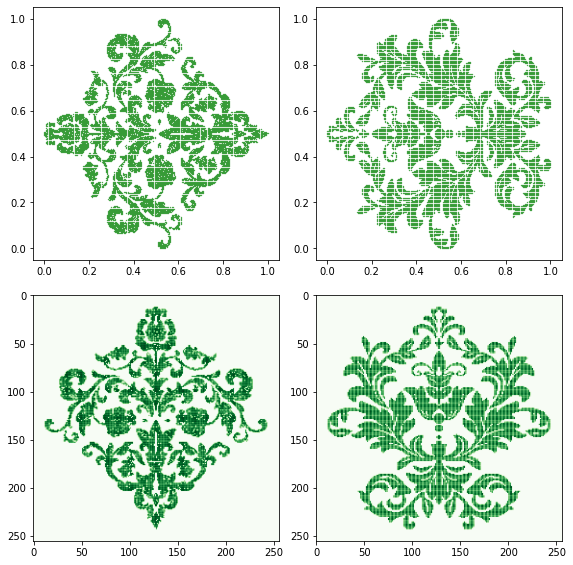

In [16]:
fig=pl.figure(figsize=(8,8))
fig.add_subplot(2,2,1)
pl.scatter(coords_int[0][:,0],coords_int[0][:,1],s=.1,c='g')
fig.add_subplot(2,2,2)
pl.scatter(coords_int[30][:,0],coords_int[30][:,1],s=.1,c='g')
fig.add_subplot(2,2,3); pl.imshow(imgs[0],cmap='Greens')
fig.add_subplot(2,2,4); pl.imshow(imgs[30],cmap='Greens')
pl.tight_layout();

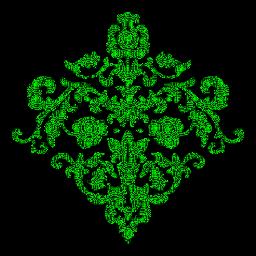

In [17]:
ch_imgs=np.zeros([60,256,256,3])
ch_imgs[:,:,:,1]=imgs
ch_imgs=np.array(ch_imgs*255,dtype=np.uint8)
file_name='pic.gif'
imageio.mimsave(file_name,ch_imgs)
Image(open(file_name,'rb').read())